In [44]:
import colorednoise as cn
import numpy as np
from matplotlib  import pyplot as plt
from scipy import *
from scipy.linalg import norm, pinv
from sklearn.cluster import KMeans
import random

(65536,)


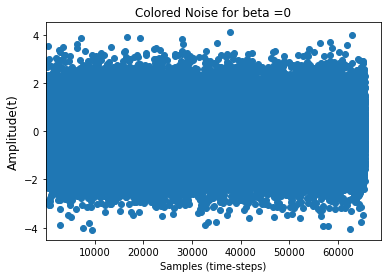

In [53]:

# Valores de entraada
beta = 0
# the exponent: 0=white noite; 1=pink noise; 2=red noise, (also "brownian noise")
samples = 2**16                         # number of samples to generate (time series extension)
#Deffing some colores
A = cn.powerlaw_psd_gaussian(beta, samples)
K = np.array(range(0, samples, 1))
print(A.shape)
#Ploting first subfiure
plt.scatter(K, A)
plt.title('Colored Noise for beta ='+str(beta))
plt.xlabel('Samples (time-steps)')
plt.ylabel('Amplitude(t)', fontsize='large')
plt.xlim(1)
plt.show()

In [46]:
# Calculando a função r[k]
r = np.zeros(65536)

# Inicializando r0 até r3
r[0] = A[0]
r[1] = 1.8*r[0] + A[1]
r[2] = 1.8*r[1] - 2*r[0] + A[2]
r[3] = 1.8*r[2] - 2*r[1] + 1.2*r[0] + A[3]

for k in range(4, 65536):
    r[k] = 1.8*r[k-1] - 2.0*r[k-2] + 1.2*r[k-3] - 0.4*r[k-4] + A[k]
    
print(r[0])
print(r[1])
print(r[2])
print(r[3])
    

-1.4498098015280814
-3.313152982692487
-3.4020932467975205
-0.5653052037184636


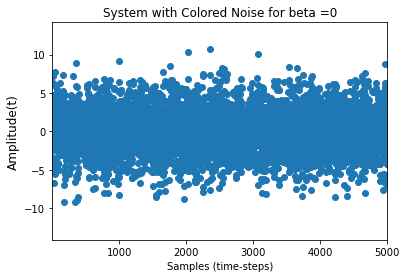

In [57]:
#Plotando r[k]
#Ploting first subfiure
plt.scatter(K, r)
plt.title('System with Colored Noise for beta ='+str(beta))
plt.xlabel('Samples (time-steps)')
plt.ylabel('Amplitude(t)', fontsize='large')
plt.xlim(1,5000)
plt.show()

In [72]:
# Implementando o K-means
R = r.reshape(-1, 1)
k_means = KMeans(n_clusters = 100, random_state=0).fit(R)

print(k_means.cluster_centers_)

[[ -2.00632912]
 [  2.59848771]
 [ -4.65203024]
 [  0.43830844]
 [  5.08099356]
 [ -0.72980614]
 [ -3.56088948]
 [ -6.36241482]
 [  1.39391773]
 [  6.25468061]
 [  2.99193906]
 [  4.15322106]
 [ -2.68633292]
 [  8.0490082 ]
 [ -9.28819395]
 [ -1.32715192]
 [ -0.44926438]
 [  0.97426804]
 [  2.35375397]
 [ -0.05769306]
 [ -4.10823992]
 [ -7.5421352 ]
 [  3.56851792]
 [ -5.41132241]
 [  1.82847531]
 [ -2.25904633]
 [ -3.12938705]
 [  8.55905487]
 [  5.51977571]
 [ -1.76379069]
 [ -0.97644522]
 [  7.18435497]
 [ -3.91362838]
 [  4.72007501]
 [  2.11440234]
 [  0.18224386]
 [ 10.26483532]
 [ -5.88812955]
 [  3.27169796]
 [  1.67818994]
 [  1.25687809]
 [ -8.56781739]
 [ -1.21479342]
 [ -5.00940434]
 [  6.82659498]
 [  0.70682975]
 [  1.11301988]
 [  4.33986221]
 [  3.75253749]
 [ -2.84006001]
 [ -6.90453018]
 [-12.4961378 ]
 [ -0.30886138]
 [  2.72058952]
 [ -2.53743304]
 [ -1.54283107]
 [ -3.72997501]
 [  0.57416965]
 [ -4.47845501]
 [ -5.64248842]
 [ -0.59378364]
 [  3.95562905]
 [ 12.66